In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
customized_path_to_homework = "/content/gdrive/My Drive/Research"
sys.path.append(customized_path_to_homework)
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta
import warnings
import seaborn as sns
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')

Mounted at /content/gdrive


In [2]:
file_name = "cs5040_fall_2020"

fall_abstracted_data = pd.read_csv("/content/gdrive/My Drive/Research/" + file_name + "_merged_result_unannotated.csv")
fall_sorted_data = pd.read_csv("/content/gdrive/My Drive/Research/" + file_name + "_sorted.csv")
fall_abstracted_data = fall_abstracted_data[ (fall_abstracted_data['user ID'] != 58) & (fall_abstracted_data['user ID'] != 1090) ]
fall_sorted_data = fall_sorted_data[ (fall_sorted_data['user_id'] != 58) & (fall_sorted_data['user_id'] != 1090) ]

spring_file_name = "cs5040_spring_2021"
spring_abstracted_data = pd.read_csv("/content/gdrive/My Drive/Research/" + spring_file_name + "_merged_result_unannotated.csv")
spring_sorted_data = pd.read_csv("/content/gdrive/My Drive/Research/" + spring_file_name + "_sorted.csv")
spring_abstracted_data = spring_abstracted_data[ (spring_abstracted_data['user ID'] != 58) & (spring_abstracted_data['user ID'] != 1090) ]
spring_sorted_data = spring_sorted_data[ (spring_sorted_data['user_id'] != 58) & (spring_sorted_data['user_id'] != 1090) ]

cs5040_abstracted = pd.concat([fall_abstracted_data, spring_abstracted_data])
cs5040_sorted = pd.concat([fall_sorted_data, spring_sorted_data], ignore_index=True)

In [3]:
# Remove duplicated entires
cs5040_sorted = cs5040_sorted.drop_duplicates(subset=['action_time', 'short_name', 'user_id'], keep=False)

,id,user_id,inst_book_id,name,description,action_time,inst_chapter_module_id,inst_section_id,inst_exercise_id,short_name,ex_type
0,28378143,522,814,document-ready,"""User loaded the 01.01 Data Structures and Alg...",2020-08-25 01:29:38,79662.0,NaN,NaN,NaN,NaN
1,28378141,522,814,window-unload,"""User closed or refreshed 01.01 Data Structure...",2020-08-25 01:36:05,79662.0,NaN,NaN,NaN,NaN
2,28378137,522,814,window-focus,"""User looking at 01.01 Data Structures and Alg...",2020-08-25 01:36:19,79662.0,NaN,NaN,NaN,NaN
3,28378140,522,814,window-unload,"""User closed or refreshed 01.01 Data Structure...",2020-08-25 01:36:20,79662.0,NaN,NaN,NaN,NaN
6,28378142,522,814,document-ready,"""User loaded the 01.01 Data Structures and Alg...",2020-08-25 01:36:33,79662.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
740882,38334185,14938,921,odsa-exercise-init,"{""gen_array"":[],""gen_incrs"":[36,12,34,5],""ev_n...",2021-04-20 18:41:06,88503.0,138026.0,267.0,firstFitPRO,pe
740883,38334186,14938,921,window-unload,"""User closed or refreshed 14.04 First Fit module""",2021-04-20 18:41:14,88503.0,NaN,NaN,NaN,NaN
740884,38784983,14938,921,document-ready,"""User loaded the 04.04 Logarithms module""",2021-05-05 14:47:10,88389.0,NaN,NaN,NaN,NaN
740885,38784986,14938,921,window-unload,"""User closed or refreshed 04.04 Logarithms mod...",2021-05-05 14:47:39,88389.0,NaN,NaN,NaN,NaN


In [5]:
cs5040_sorted['action_time'] = pd.to_datetime(cs5040_sorted['action_time']) 
cs5040_sorted['delta_time'] = cs5040_sorted[cs5040_sorted['ex_type'] == 'ss'].groupby(['user_id', 'short_name'])['action_time'].diff()
cs5040_sorted[cs5040_sorted['ex_type'] == 'ss']
cs5040_sorted['delta_time'] = cs5040_sorted['delta_time'].dt.total_seconds()
less_than_15 = cs5040_sorted[cs5040_sorted['delta_time'] < 15]

Reading time distribution

count    1.509390e+05
mean     4.672640e+04
std      5.462817e+05
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      2.797416e+07
Name: delta_time, dtype: float64

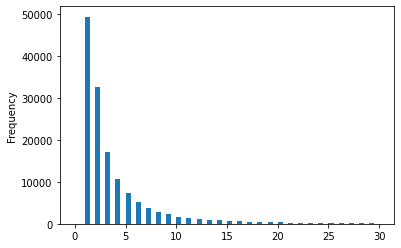

In [6]:
threshold = 30
p = cs5040_sorted['delta_time'].plot.hist(bins= 60, range=(0, 30))
cs5040_sorted['delta_time'].describe()

Top 6 modules students completed

In [7]:
exercises = cs5040_sorted[cs5040_sorted['ex_type'] == "ss"]
print(cs5040_sorted[cs5040_sorted['inst_chapter_module_id'] == 79785.0]['description'])
exercises.groupby('inst_chapter_module_id')['user_id'].nunique().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

2183                    {"gen_array":[16,29,61],"ev_num":0}
2459           {"ev_num":4,"currentStep":1,"totalSteps":15}
2460        "User looking at 12.06 External Sorting module"
2461           {"ev_num":5,"currentStep":2,"totalSteps":15}
2462           {"ev_num":6,"currentStep":3,"totalSteps":15}
                                ...                        
411935                  {"gen_array":[30,42,45],"ev_num":0}
411936    "User closed or refreshed 12.06 External Sorti...
411946      "User loaded the 12.06 External Sorting module"
411949                  {"gen_array":[11,17,35],"ev_num":0}
411951    "User closed or refreshed 12.06 External Sorti...
Name: description, Length: 13658, dtype: object


,inst_chapter_module_id,count
16,79718.0,39
52,79787.0,39
37,79765.0,38
3,79692.0,38
41,79770.0,38
44,79773.0,37
50,79785.0,37
39,79767.0,37
56,79792.0,37
54,79790.0,37


In [12]:
between_8_and_15 = cs5040_sorted[ (cs5040_sorted['delta_time'] <= 15 ) & (cs5040_sorted['delta_time'] >= 8) ]

In [13]:
cs5040_abstracted
rm_duplicated = cs5040_abstracted.drop_duplicates(subset=['Start time', 'End Time', 'user ID'], keep=False)
rm_duplicated

,session,user ID,Inst Book,Event name,Event Description,Start time,End Time,Action Time,Exercise Type,Number of events
201,1,522,814,document event,"""User loaded the 01.01 Data Structures and Alg...",2020-08-25 01:29:38,2020-08-25 01:29:38,NaN,NaN,1
202,1,522,814,window event,"""User closed or refreshed 01.01 Data Structure...",2020-08-25 01:36:05,2020-08-25 01:36:05,NaN,NaN,1
203,1,522,814,Window open,"""User looking at 01.01 Data Structures and Alg...",2020-08-25 01:36:19,2020-08-25 01:36:19,Reading time: 1.0 sec,NaN,1
204,1,522,814,window event,"""User closed or refreshed 01.01 Data Structure...",2020-08-25 01:36:20,2020-08-25 01:36:24,In slideshow for 4.0 seconds,NaN,2
205,1,522,814,window event,"""User is no longer looking at 01.01 Data Struc...",2020-08-25 01:36:24,2020-08-25 01:36:24,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
92970,8,14938,921,PE event,Attempted to solve PE,2021-04-20 18:22:54,2021-04-20 18:26:55,241.0 seconds,NaN,9
92971,8,14938,921,window event,"""User closed or refreshed 14.04 First Fit module""",2021-04-20 18:41:05,2021-04-20 18:41:05,NaN,NaN,1
92974,8,14938,921,window event,"""User closed or refreshed 14.04 First Fit module""",2021-04-20 18:41:14,2021-04-20 18:41:14,NaN,NaN,1
92975,9,14938,921,document event,"""User loaded the 04.04 Logarithms module""",2021-05-05 14:47:10,2021-05-05 14:47:10,NaN,NaN,1


In [14]:
seq1 = np.asarray(['document event', 'FF event'])
seq2 = np.asarray(['document event', 'PE event'])
seq3 = np.asarray(['Window open', 'FF event'])
seq4 = np.asarray(['window event', 'PE event'])

N = len(seq1)

In [15]:
def rolling_window(a, window):
  shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
  strides = a.strides + (a.strides[-1],)
  c = np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
  return c

In [16]:
arr = rm_duplicated['Event name'].values
b = np.all( (rolling_window(arr, N) == seq1) | (rolling_window(arr, N) == seq2) | (rolling_window(arr, N) == seq3) | (rolling_window(arr, N) == seq4), axis = 1)
c = np.mgrid[0:len(b)][b]

d = [i for x in c for i in range(x, x + N)]
rm_duplicated['seq_count'] = np.in1d(np.arange(len(arr)), d)

Behavior 1 Activity Sessions Behavior

In [17]:
print((rm_duplicated[rm_duplicated['seq_count'] == True].groupby('user ID')['user ID'].count() / 2).index)
print((rm_duplicated[rm_duplicated['seq_count'] == True].groupby('user ID')['user ID'].count() / 2).values)
rm_duplicated[ (rm_duplicated['Action Time'].isnull() == False) & (rm_duplicated['Action Time'].str.contains('Reading'))]

Int64Index([  522,   756,   786,  2152,  2954,  3259,  4258,  4844,  5999,
             7015,  8333,  8683,  9378,  9832,  9845,  9846,  9853,  9978,
             9980, 10273, 10334, 10706, 10944, 11030, 11076, 11087, 11103,
            11243, 11252, 11261, 11422, 11423, 11426, 11427, 11429, 11430,
            11434, 11435, 11436, 11442, 11443, 11457, 11461, 11467, 11468,
            11469, 11471, 11475, 11482, 11487, 11506, 11509, 11512, 11514,
            11526, 11546, 11554, 11585, 11610, 11611, 11613, 11619, 11620,
            11621, 11622, 11662, 11722, 11726, 11728, 11771, 12531, 12930,
            13335, 13337, 13352, 13354, 13366, 13375, 13388, 13391, 13422,
            13471, 13522, 13550, 13556, 13562, 13563, 13564, 13565, 13566,
            13569, 13579, 13630, 13668, 13689, 13724, 13728, 14938],
           dtype='int64', name='user ID')
[128.  15.   7.   3.  17.  21.   1. 146.   3.   2.  83.   1.  12. 223.
 242. 227. 186. 211. 190.   1.  43. 355.  38.   2. 124. 439.   2. 22

,session,user ID,Inst Book,Event name,Event Description,Start time,End Time,Action Time,Exercise Type,Number of events,seq_count
203,1,522,814,Window open,"""User looking at 01.01 Data Structures and Alg...",2020-08-25 01:36:19,2020-08-25 01:36:19,Reading time: 1.0 sec,NaN,1,False
210,1,522,814,Window open,"""User looking at 03.12 Testing module""",2020-08-25 01:56:21,2020-08-25 01:56:21,Reading time: 1.0 sec,NaN,1,False
230,5,522,814,Window open,"""User looking at 07.02 The List ADT module""",2020-08-26 18:43:10,2020-08-26 18:43:10,Reading time: 1.0 sec,NaN,1,True
256,7,522,814,Window open,"""User looking at 10.06 Implementing Tree Trave...",2020-08-27 17:43:46,2020-08-27 17:43:46,Reading time: 1.0 sec,NaN,1,False
293,10,522,814,Window open,"""User looking at 14.07 Worst Fit module""",2020-08-29 02:55:45,2020-08-29 02:55:45,Reading time: 17.0 sec,NaN,1,False
...,...,...,...,...,...,...,...,...,...,...,...
92940,3,14938,921,Window open,"""User looking at 12.06 External Sorting module""",2021-03-23 19:09:52,2021-03-23 19:09:52,Reading time: 3.0 sec,NaN,1,False
92942,3,14938,921,Window open,"""User looking at 12.06 External Sorting module""",2021-03-23 19:09:58,2021-03-23 19:09:58,Reading time: 1.0 sec,NaN,1,False
92944,3,14938,921,Window open,"""User looking at 12.06 External Sorting module""",2021-03-23 19:13:44,2021-03-23 19:13:44,Reading time: 1.0 sec,NaN,1,False
92953,7,14938,921,Window open,"""User looking at 16.05 Shortest-Paths Problems...",2021-04-15 18:13:43,2021-04-15 18:13:43,Reading time: 164.0 sec,NaN,1,True


Behavior 2 (15 <= Reading time <= 120 & must be in sequence)

Int64Index([  522,   756,   786,  2954,  4844,  5999,  9832,  9845,  9846,
             9853,  9980, 10334, 10706, 10944, 11076, 11087, 11243, 11252,
            11261, 11422, 11423, 11426, 11427, 11429, 11430, 11435, 11443,
            11457, 11461, 11467, 11468, 11469, 11471, 11475, 11482, 11506,
            11512, 11514, 11546, 11554, 11610, 11611, 11622, 11722, 11771,
            13335, 13337, 13352, 13354, 13366, 13375, 13388, 13391, 13422,
            13471, 13522, 13550, 13556, 13562, 13565, 13566, 13579, 13668,
            13689, 13728],
           dtype='int64', name='user ID')
[ 9  1  1  2  1  1  9  3 12  7 12  3 14  3 21  8  5  9 20 69  9 32 43 18
 43 26 35 45 13 35  4 56 20 15 28  7 28 13 22 39 13  1  4  5  3 18  6 19
 61 18  4  4  6  9 17 25 27  1 11 14 12 17 10  8  1]
count    4922.000000
mean       68.351483
std       199.698441
min         1.000000
25%         1.000000
50%         6.000000
75%        42.000000
max      3526.000000
Name: Action Time, dtype: float64


Text(0, 0.5, 'Number of Instances')

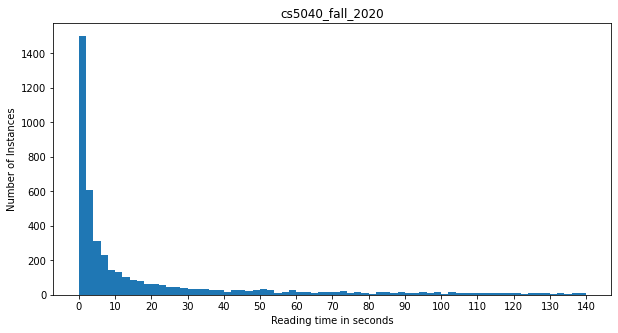

In [18]:
behavior2 = rm_duplicated[ (rm_duplicated['Action Time'].str.contains('Reading time') == True) & (rm_duplicated['seq_count'] == True) ]
behavior2
behavior2['Action Time'] = behavior2['Action Time'].str[13:-3].astype(float)
behavior2 = behavior2[ (behavior2['Action Time'] > 0) ] # Ignore reading time less than 1 second
behavior2

behavior2_between_ranges = behavior2[ (behavior2['Action Time'] >= 15) & (behavior2['Action Time'] <= 90) ] # reading time ranges between 6 and 26 seconds
print(behavior2_between_ranges.groupby('user ID')['user ID'].count().index)   
print(behavior2_between_ranges.groupby('user ID')['user ID'].count().values)

# Plotting
print(behavior2['Action Time'].describe())
p = behavior2['Action Time'].plot.hist(bins = 70, range = (0, 140), figsize=(10,5) )
p.set_xticks(range(0, 150, 10))
p.set_title(file_name)
p.set_xlabel("Reading time in seconds")
p.set_ylabel("Number of Instances")

In [19]:
b2 = cs5040_abstracted[cs5040_abstracted['Action Time'].str.contains("Reading time") == True]
b2['Action Time'] = b2['Action Time'].str[13:-3].astype(float)
temp = b2[b2['Action Time'] > 1]
temp
# p = temp['Action Time'].plot.hist(bins = 60, range = (0, 600), figsize=(30,5))
# p.set_xlabel("Reading Time (seconds)")
# p.set_ylabel("Number of Instances")
# temp['Action Time'].describe()

,session,user ID,Inst Book,Event name,Event Description,Start time,End Time,Action Time,Exercise Type,Number of events
223,2,522,814,Window open,"""User looking at 05.07 Lower Bounds and Theta ...",2020-08-25 17:56:57,2020-08-25 17:56:57,9.0,NaN,1
260,7,522,814,Window open,"""User looking at 10.05 Binary Tree Traversals ...",2020-08-27 17:43:48,2020-08-27 17:43:48,26.0,NaN,1
264,7,522,814,Window open,"""User looking at 10.06 Implementing Tree Trave...",2020-08-27 17:48:46,2020-08-27 17:48:46,361.0,NaN,1
293,10,522,814,Window open,"""User looking at 14.07 Worst Fit module""",2020-08-29 02:55:45,2020-08-29 02:55:45,17.0,NaN,1
300,10,522,814,Window open,"""User looking at 14.09 Other Memory Allocation...",2020-08-29 03:04:33,2020-08-29 03:07:57,7.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...
92932,3,14938,921,Window open,"""User looking at 12.06 External Sorting module""",2021-03-23 18:43:02,2021-03-23 18:43:02,3.0,NaN,1
92934,3,14938,921,Window open,"""User looking at 12.06 External Sorting module""",2021-03-23 18:43:10,2021-03-23 18:43:10,369.0,NaN,1
92938,3,14938,921,Window open,"""User looking at 12.06 External Sorting module""",2021-03-23 18:49:33,2021-03-23 18:49:33,25.0,NaN,2
92940,3,14938,921,Window open,"""User looking at 12.06 External Sorting module""",2021-03-23 19:09:52,2021-03-23 19:09:52,3.0,NaN,1


Behavior 3 Credit Seeking Slideshow less than 15 sec

In [20]:
less_than_15

,id,user_id,inst_book_id,name,description,action_time,inst_chapter_module_id,inst_section_id,inst_exercise_id,short_name,ex_type,delta_time
110,28380250,522,814,jsav-forward,"{""ev_num"":1,""currentStep"":2,""totalSteps"":9}",2020-08-25 17:57:06,79697.0,124312.0,23.0,LowerBoundCON,ss,9.0
111,28380247,522,814,jsav-forward,"{""ev_num"":2,""currentStep"":3,""totalSteps"":9}",2020-08-25 17:57:12,79697.0,124312.0,23.0,LowerBoundCON,ss,6.0
112,28380254,522,814,jsav-forward,"{""ev_num"":3,""currentStep"":4,""totalSteps"":9}",2020-08-25 17:57:19,79697.0,124312.0,23.0,LowerBoundCON,ss,7.0
113,28380256,522,814,jsav-forward,"{""ev_num"":4,""currentStep"":5,""totalSteps"":9}",2020-08-25 17:57:21,79697.0,124312.0,23.0,LowerBoundCON,ss,2.0
116,28380248,522,814,jsav-forward,"{""ev_num"":7,""currentStep"":4,""totalSteps"":9}",2020-08-25 17:57:28,79697.0,124312.0,23.0,LowerBoundCON,ss,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
740788,36102817,14938,921,jsav-forward,"{""ev_num"":6,""currentStep"":6,""totalSteps"":50}",2021-03-23 18:07:43,88478.0,137992.0,89.0,heapsortCON,ss,4.0
740789,36102822,14938,921,jsav-forward,"{""ev_num"":7,""currentStep"":7,""totalSteps"":50}",2021-03-23 18:07:44,88478.0,137992.0,89.0,heapsortCON,ss,1.0
740790,36102814,14938,921,jsav-backward,"{""ev_num"":8,""currentStep"":6,""totalSteps"":50}",2021-03-23 18:07:47,88478.0,137992.0,89.0,heapsortCON,ss,3.0
740792,36102826,14938,921,jsav-forward,"{""ev_num"":10,""currentStep"":8,""totalSteps"":50}",2021-03-23 18:08:21,88478.0,137992.0,89.0,heapsortCON,ss,10.0


In [21]:
print(less_than_15.groupby('user_id')['user_id'].count().index)
print(less_than_15.groupby('user_id')['user_id'].count().values)

Int64Index([  522,   756,   786,  2152,  2954,  3259,  4258,  4844,  5999,
             8333,  9378,  9832,  9845,  9846,  9853,  9978,  9980, 10273,
            10334, 10706, 10944, 11030, 11076, 11087, 11103, 11243, 11252,
            11261, 11422, 11423, 11426, 11427, 11429, 11430, 11434, 11435,
            11442, 11443, 11457, 11461, 11467, 11468, 11469, 11471, 11475,
            11482, 11506, 11509, 11512, 11514, 11526, 11546, 11554, 11610,
            11611, 11613, 11619, 11620, 11622, 11662, 11722, 11726, 11728,
            11771, 12531, 13335, 13337, 13352, 13354, 13366, 13375, 13388,
            13391, 13422, 13471, 13522, 13550, 13556, 13562, 13563, 13565,
            13566, 13569, 13579, 13630, 13668, 13689, 13728, 14938],
           dtype='int64', name='user_id')
[ 912   11   64    6   55   36   30  516    2 1067   43 2357 1950 2142
 1832 1063 1671    5  232 1318  403    3 1197 2007   13 1736 1821 3623
 6021  718 2895 2914 1402 5338    2 2691  206 2028 3784 3519 2274  960
 